In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [96]:
train_data = pd.read_csv("dataset/raw/Train.csv")
train_data

image_id_worm worm_type  number_of_worms
0     id_0002ea6f15c7fa6f4c221783.jpg       pbw               51
1     id_0005ef295aafe6acc63587db.jpg       pbw                8
2     id_00084298dd030a500033ff78.jpg       NaN                0
3     id_00093f2c76f6488737325859.jpg       pbw               12
4     id_000b2e6c437c643f25d4a6c3.jpg       pbw               87
...                               ...       ...              ...
9895  id_ffe6e193dd78b7258d864f6b.jpg       abw                5
9896  id_ffe98feb1e592e887b81c3f0.jpg       pbw               95
9897  id_ffef90ecf47baa38434f84fb.jpg       pbw               26
9898  id_fff06bb2e59bfce437ac9fc0.jpg       NaN                0
9899  id_fffdca893564aa86ff5be4cc.jpg       pbw               31

[9900 rows x 3 columns]

In [19]:
test_data = pd.read_csv("dataset/raw/Test.csv")
test_data

image_id_worm
0     id_00332970f80fa9a47a39516d.jpg
1     id_0035981bc3ae42eb5b57a317.jpg
2     id_005102f664b820f778291dee.jpg
3     id_0066456f5fb2cd858c69ab39.jpg
4     id_007159c1fa015ba6f394deeb.jpg
...                               ...
2798  id_ffad8f3773a4222f8fe5ba1a.jpg
2799  id_ffb65e6de900c49d8f2ef95a.jpg
2800  id_ffbcb27fa549278f47505515.jpg
2801  id_ffc0e41e10b0c964d4a02811.jpg
2802  id_fff8c253115aacded09ad7ed.jpg

[2803 rows x 1 columns]

In [18]:
bbox_data = pd.read_csv("dataset/raw/images_bboxes.csv")
bbox_data

image_id worm_type  \
0       id_8ada71185e18dc8838b4925b.jpg       pbw   
1       id_8ada71185e18dc8838b4925b.jpg       pbw   
2       id_8ada71185e18dc8838b4925b.jpg       abw   
3       id_bc86d3cfd0c0463fa5cae33e.jpg       abw   
4       id_bc86d3cfd0c0463fa5cae33e.jpg       abw   
...                                 ...       ...   
140228  id_23617d0cdd8f04091b50106d.jpg       pbw   
140229  id_23617d0cdd8f04091b50106d.jpg       pbw   
140230  id_23617d0cdd8f04091b50106d.jpg       pbw   
140231  id_23617d0cdd8f04091b50106d.jpg       pbw   
140232  id_23617d0cdd8f04091b50106d.jpg       pbw   

                                                 geometry  
0       POLYGON ((2478.89 156.77, 2478.89 297.86, 2377...  
1       POLYGON ((939.8199999999999 1221.46, 939.81999...  
2       POLYGON ((1559.7 1558.06, 1559.7 1966.3, 1129....  
3       POLYGON ((2090.216399557101 1537.2100674812148...  
4       POLYGON ((2342.2568587778546 1676.304250464547...  
...                                                   ...  
140228  POLYGON ((2221.63 1777.34, 2221.63 1835.629999...  
140229  POLYGON ((2471.71 1610.92, 2471.71 1685.66, 23...  
140230  POLYGON ((1819.7 2174.09, 1819.7 2248.83, 1732...  
140231  POLYGON ((2003.5 2445.33, 2003.5 2477.77, 1940...  
140232  POLYGON ((2434.52 1352.21, 2434.52 1413.98, 23...  

[140233 rows x 3 columns]

In [22]:
bbox_ids = set(bbox_data.image_id.unique())
train_ids = set(train_data.image_id_worm.unique())
test_ids = set(test_data.image_id_worm.unique())

In [47]:
len(train_ids)

9737

In [37]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9900 entries, 0 to 9899
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   image_id_worm    9900 non-null   object
 1   worm_type        6642 non-null   object
 2   number_of_worms  9900 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 232.2+ KB


In [48]:
bbox_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140233 entries, 0 to 140232
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   image_id   140233 non-null  object
 1   worm_type  136975 non-null  object
 2   geometry   136975 non-null  object
dtypes: object(3)
memory usage: 3.2+ MB


In [45]:
(bbox_data[bbox_data.worm_type.isna()])

image_id worm_type geometry
532    id_e45d64c9ab7a54e05b99ecdc.jpg       NaN      NaN
572    id_55c69d3402c27bbe37ac6683.jpg       NaN      NaN
620    id_1b746acec11fc62f95db2bcb.jpg       NaN      NaN
641    id_5d6a2c8811a294f14bcde464.jpg       NaN      NaN
651    id_4e75189682009c5574f66c90.jpg       NaN      NaN
...                                ...       ...      ...
9872   id_d19b17f61b6ddacfb3ae924c.jpg       NaN      NaN
9957   id_d6e8627c4cd8825494315661.jpg       NaN      NaN
10250  id_f5af7467096b0ab845d7dc08.jpg       NaN      NaN
10289  id_8c63e8a65494a10e6f08c48f.jpg       NaN      NaN
10715  id_dbef699e1569e2d1574b43ce.jpg       NaN      NaN

[3258 rows x 3 columns]

In [49]:
train_data.worm_type.value_counts()

pbw    4947
abw    1695
Name: worm_type, dtype: int64

In [50]:
train_data.describe()

number_of_worms
count      9900.000000
mean         13.835859
std          35.314402
min           0.000000
25%           0.000000
50%           3.000000
75%          10.000000
max         527.000000

<AxesSubplot:>

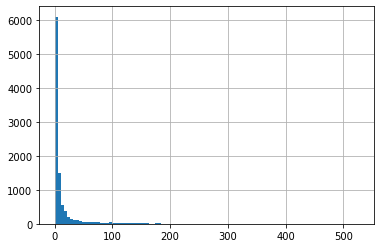

In [55]:
train_data.number_of_worms.hist(bins=100)

In [62]:
import collections
od =dict(train_data.number_of_worms.value_counts())
od = collections.OrderedDict(sorted(od.items()))
od

OrderedDict([(0, 3258),
             (1, 787),
             (2, 491),
             (3, 552),
             (4, 494),
             (5, 515),
             (6, 412),
             (7, 334),
             (8, 326),
             (9, 255),
             (10, 183),
             (11, 144),
             (12, 130),
             (13, 104),
             (14, 91),
             (15, 89),
             (16, 82),
             (17, 60),
             (18, 73),
             (19, 52),
             (20, 60),
             (21, 45),
             (22, 52),
             (23, 48),
             (24, 36),
             (25, 27),
             (26, 29),
             (27, 27),
             (28, 23),
             (29, 27),
             (30, 24),
             (31, 26),
             (32, 27),
             (33, 22),
             (34, 20),
             (35, 31),
             (36, 18),
             (37, 26),
             (38, 19),
             (39, 20),
             (40, 15),
             (41, 22),
             (42, 13),
      

In [63]:
train_data.columns

Index(['image_id_worm', 'worm_type', 'number_of_worms'], dtype='object')

In [75]:
train_data

image_id_worm worm_type  number_of_worms
0     id_0002ea6f15c7fa6f4c221783.jpg       pbw               51
1     id_0005ef295aafe6acc63587db.jpg       pbw                8
2     id_00084298dd030a500033ff78.jpg       NaN                0
3     id_00093f2c76f6488737325859.jpg       pbw               12
4     id_000b2e6c437c643f25d4a6c3.jpg       pbw               87
...                               ...       ...              ...
9895  id_ffe6e193dd78b7258d864f6b.jpg       abw                5
9896  id_ffe98feb1e592e887b81c3f0.jpg       pbw               95
9897  id_ffef90ecf47baa38434f84fb.jpg       pbw               26
9898  id_fff06bb2e59bfce437ac9fc0.jpg       NaN                0
9899  id_fffdca893564aa86ff5be4cc.jpg       pbw               31

[9900 rows x 3 columns]

In [275]:
import os
from torchvision.io import read_image
import torch
from torch.utils.data import Dataset
import torchvision.transforms as T

class CustomImageDataset(Dataset):
    def __init__(self, img_data, img_dir, transform=None, target_transform=None):
        self.img_data = img_data
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_data)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_ids[idx])
        image = read_image(img_path)
        image = T.Resize(size=(256,256))(image)
        return image
        

In [276]:
img_dir = "dataset/raw/images"
training_dataset = CustomImageDataset(train_data,img_dir)

In [277]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_dataset, batch_size= 16, shuffle=False,num_workers =32)

In [278]:
images =next(iter(train_dataloader))

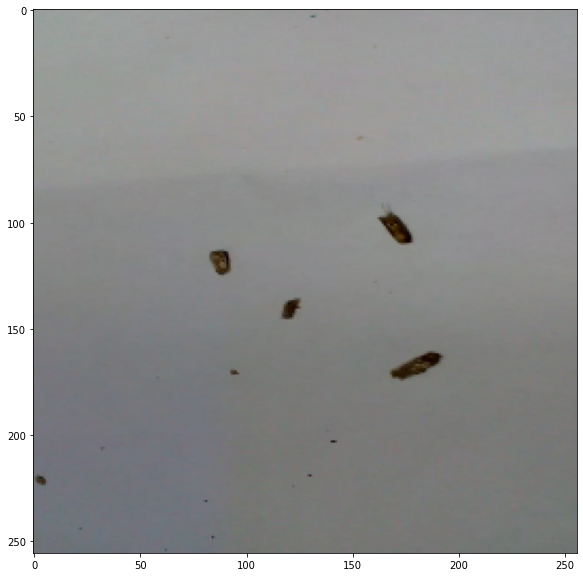

In [280]:
plt.figure(figsize=(10,10))
plt.imshow(images[13].T)

In [180]:
import time
from multiprocessing import Pool
 

def get_dim(img_id):
    img_dir = "dataset/raw/images"
    img_path = os.path.join(img_dir,img_id)
    return {img_id:read_image(img_path).numpy().shape}

start_time = time.time()

with Pool() as pool:
    train_ids = list(train_data.loc[:,"image_id_worm"])
    result = pool.map(get_dim,list(train_ids))
    
print("--- %s seconds ---" % (time.time() - start_time))

--- 36.95678186416626 seconds ---


In [181]:
train_data["img_dim"] = result
img_dim = {}
for i in result:
    img_dim[list(i.keys())[0]] = list(i.values())[0]

img_dim_df = pd.DataFrame(img_dim).T
img_dim_df

In [202]:
img_dim_df.drop([0],axis =1,inplace=True)
img_dim_df.columns = ["height","width"]

img_dim_df["image_id_worm"] = img_dim_df.index 
img_dim_df.reset_index(drop=True,inplace=True)

In [211]:
train_data= train_data.merge(img_dim_df, on = 'image_id_worm')

In [216]:
train_data.columns  = ['image_id_worm', 'worm_type', 'number_of_worms','img_height',
       'img_width']
train_data

image_id_worm worm_type  number_of_worms  img_height  \
0     id_0002ea6f15c7fa6f4c221783.jpg       pbw               51        3472   
1     id_0005ef295aafe6acc63587db.jpg       pbw                8        4160   
2     id_00084298dd030a500033ff78.jpg       NaN                0        3024   
3     id_00093f2c76f6488737325859.jpg       pbw               12        3000   
4     id_000b2e6c437c643f25d4a6c3.jpg       pbw               87        3008   
...                               ...       ...              ...         ...   
9895  id_ffe6e193dd78b7258d864f6b.jpg       abw                5        3120   
9896  id_ffe98feb1e592e887b81c3f0.jpg       pbw               95        1040   
9897  id_ffef90ecf47baa38434f84fb.jpg       pbw               26        3120   
9898  id_fff06bb2e59bfce437ac9fc0.jpg       NaN                0        3000   
9899  id_fffdca893564aa86ff5be4cc.jpg       pbw               31        4160   

      img_width  
0          4624  
1          3120  
2          4032  
3          4000  
4          4000  
...         ...  
9895       4160  
9896        780  
9897       4160  
9898       4000  
9899       3120  

[9900 rows x 5 columns]

In [223]:
!ls dataset/preproc

train.csv


In [221]:
train_data.to_csv("dataset/preproc/train.csv",index=False)

In [222]:
train_data.describe()

number_of_worms   img_height    img_width
count      9900.000000  9900.000000  9900.000000
mean         13.835859  3086.170606  3594.472929
std          35.314402   864.313485  1010.696193
min           0.000000   152.000000   166.000000
25%           0.000000  2610.000000  3120.000000
50%           3.000000  3120.000000  4000.000000
75%          10.000000  3472.000000  4160.000000
max         527.000000  6944.000000  9280.000000

### Create Data for filtering model

In [300]:
filter_data = train_data.drop_duplicates(["image_id_worm"])


In [301]:
filter_data["bw"] =  filter_data["number_of_worms"].apply(lambda x: 0 if x==0 else 1)
filter_data

<ipython-input-301-8661c1a9d503>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_data["bw"] =  filter_data["number_of_worms"].apply(lambda x: 0 if x==0 else 1)


image_id_worm worm_type  number_of_worms  img_height  \
0     id_0002ea6f15c7fa6f4c221783.jpg       pbw               51        3472   
1     id_0005ef295aafe6acc63587db.jpg       pbw                8        4160   
2     id_00084298dd030a500033ff78.jpg       NaN                0        3024   
3     id_00093f2c76f6488737325859.jpg       pbw               12        3000   
4     id_000b2e6c437c643f25d4a6c3.jpg       pbw               87        3008   
...                               ...       ...              ...         ...   
9895  id_ffe6e193dd78b7258d864f6b.jpg       abw                5        3120   
9896  id_ffe98feb1e592e887b81c3f0.jpg       pbw               95        1040   
9897  id_ffef90ecf47baa38434f84fb.jpg       pbw               26        3120   
9898  id_fff06bb2e59bfce437ac9fc0.jpg       NaN                0        3000   
9899  id_fffdca893564aa86ff5be4cc.jpg       pbw               31        4160   

      img_width  bw  
0          4624   1  
1          3120   1  
2          4032   0  
3          4000   1  
4          4000   1  
...         ...  ..  
9895       4160   1  
9896        780   1  
9897       4160   1  
9898       4000   0  
9899       3120   1  

[9737 rows x 6 columns]

In [302]:
filter_data.drop(["number_of_worms","worm_type","img_height","img_width"],axis=1,inplace=True)


/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [305]:
filter_data.to_csv("data/preproc/filter_data.csv",index=False)

In [306]:
filter_data

image_id_worm  bw
0     id_0002ea6f15c7fa6f4c221783.jpg   1
1     id_0005ef295aafe6acc63587db.jpg   1
2     id_00084298dd030a500033ff78.jpg   0
3     id_00093f2c76f6488737325859.jpg   1
4     id_000b2e6c437c643f25d4a6c3.jpg   1
...                               ...  ..
9895  id_ffe6e193dd78b7258d864f6b.jpg   1
9896  id_ffe98feb1e592e887b81c3f0.jpg   1
9897  id_ffef90ecf47baa38434f84fb.jpg   1
9898  id_fff06bb2e59bfce437ac9fc0.jpg   0
9899  id_fffdca893564aa86ff5be4cc.jpg   1

[9737 rows x 2 columns]

In [307]:
filter_data

image_id_worm  bw
0     id_0002ea6f15c7fa6f4c221783.jpg   1
1     id_0005ef295aafe6acc63587db.jpg   1
2     id_00084298dd030a500033ff78.jpg   0
3     id_00093f2c76f6488737325859.jpg   1
4     id_000b2e6c437c643f25d4a6c3.jpg   1
...                               ...  ..
9895  id_ffe6e193dd78b7258d864f6b.jpg   1
9896  id_ffe98feb1e592e887b81c3f0.jpg   1
9897  id_ffef90ecf47baa38434f84fb.jpg   1
9898  id_fff06bb2e59bfce437ac9fc0.jpg   0
9899  id_fffdca893564aa86ff5be4cc.jpg   1

[9737 rows x 2 columns]

In [317]:
from sklearn.model_selection import train_test_split
filter_train,filter_test =  train_test_split(filter_data, test_size=0.1, random_state=42)
filter_train

image_id_worm  bw
7095  id_b5b0e6ccdfa3498f7ce1ed30.jpg   0
2797  id_47cf95ad9f66e385a9f3234f.jpg   1
390   id_0a2addc9e7746f4717100569.jpg   1
9220  id_edec3128cda56eec2216fb60.jpg   1
1169  id_1e07837c4edc6b351f68cc31.jpg   1
...                               ...  ..
5828  id_9664a9f9e9248e5f3f8d1b75.jpg   1
5275  id_88c936ae821b6f34d99944da.jpg   0
5478  id_8e197836ac49790ac3fa1bcb.jpg   1
880   id_16b1fe6a7baddd021ba65258.jpg   1
7403  id_bd93ea1e107c7f45877cac67.jpg   1

[8763 rows x 2 columns]

<AxesSubplot:>

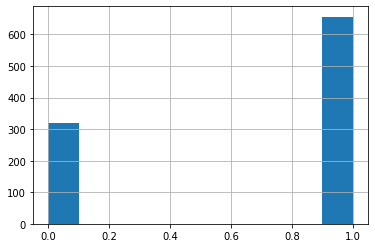

In [319]:
filter_test.bw.hist()

<AxesSubplot:>

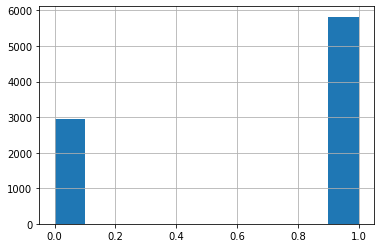

In [320]:
filter_train.bw.hist()

In [195]:
filter_data = pd.read_csv("data/preproc/filter_data.csv")
filter_data

image_id_worm  bw
0     id_0002ea6f15c7fa6f4c221783.jpg   1
1     id_0005ef295aafe6acc63587db.jpg   1
2     id_00084298dd030a500033ff78.jpg   0
3     id_00093f2c76f6488737325859.jpg   1
4     id_000b2e6c437c643f25d4a6c3.jpg   1
...                               ...  ..
9732  id_ffe6e193dd78b7258d864f6b.jpg   1
9733  id_ffe98feb1e592e887b81c3f0.jpg   1
9734  id_ffef90ecf47baa38434f84fb.jpg   1
9735  id_fff06bb2e59bfce437ac9fc0.jpg   0
9736  id_fffdca893564aa86ff5be4cc.jpg   1

[9737 rows x 2 columns]

In [196]:
import random
random.seed(42)
neg_examples = filter_data[filter_data.bw==0].index
pos_examples = filter_data[filter_data.bw==1].index
x1 = random.sample(range(1,len(neg_examples)), 300)
test_index =[neg_examples[i] for i in x1]
x2 = random.sample(range(1,len(pos_examples)), 300)
test_index +=[pos_examples[i] for i in x2]

In [197]:
test_filter =filter_data[filter_data.index.isin(test_index)]
train_filter = filter_data[~filter_data.index.isin(test_index)]

In [198]:
test_filter.bw.value_counts()

1    300
0    300
Name: bw, dtype: int64

In [199]:
train_filter.bw.value_counts()

1    6179
0    2958
Name: bw, dtype: int64

In [200]:
set(train_filter.image_id_worm).intersection(set(test_filter.image_id_worm))

set()

In [201]:
test_filter.to_csv("data/preproc/test_filter.csv",index=False)
train_filter.to_csv("data/preproc/train_filter.csv",index=False)

In [27]:
# Pytorch
import torch
import torch.nn as nn
from torchvision import models



def build_model():
#     if CFG.model_name == "resnet50":
    model_ft = models.resnet18(weights="IMAGENET1K_V1")
    num_ftrs = model_ft.fc.in_features
    model_ft.fc = nn.Sequential(
        nn.Linear(num_ftrs, 128),
        nn.Linear(128, 2))
#     model_ft = model_ft.to()
    return model_ft


In [28]:
model = build_model()
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [31]:
pytorch_total_params = sum(p.numel() for p in model.fc.parameters())
pytorch_total_params

65922

In [14]:
23512130/11177538

2.1035159978879068

In [22]:
for p in model.fc.parameters():print(p)

Parameter containing:
tensor([[-0.0421, -0.0378, -0.0389,  ..., -0.0232, -0.0343, -0.0397],
        [ 0.0104,  0.0350, -0.0311,  ..., -0.0018, -0.0233, -0.0261]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0366, -0.0044], requires_grad=True)


In [32]:
import glob
glob.glob("data/raw/images/*.png")

['data/raw/images/id_89889248b9d02797d8f9c883.png']

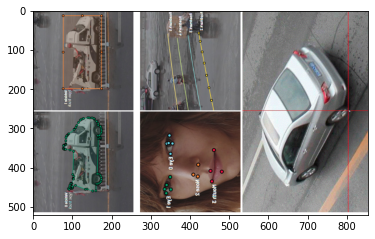

In [42]:
from torchvision.io import read_image
import matplotlib.pyplot as plt
image_path='data/raw/images/id_89889248b9d02797d8f9c883.png'
plt.imshow(read_image(image_path).T)

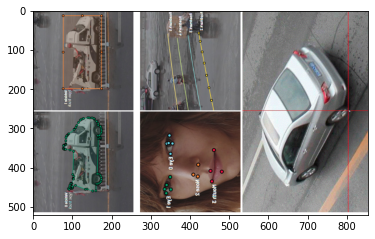

In [43]:
plt.imshow(read_image(image_path).T)

In [39]:
import cv2
im = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
im.shape

(854, 521, 4)

In [46]:
!ls data/preproc/test_filter.csv

data/preproc/test_filter.csv


In [50]:
import pandas as pd
train_filter = pd.read_csv("data/preproc/train_filter.csv")
train_filter[train_filter.image_id_worm=="id_89889248b9d02797d8f9c883.png"]

image_id_worm  bw
330  id_89889248b9d02797d8f9c883.png   0

## Convert jpg to numpy

In [72]:
type(os.listdir("data/raw/images"))

list

In [185]:
import time
from multiprocessing import Pool
import torchvision.transforms as T

def to_npy(img_id):
    img_dir = "data/raw/images"
    img_path = os.path.join(img_dir,img_id)
    out_path = f"data/preproc/npy/{os.path.splitext(img_id)[0]}"
    image = cv2.imread(img_path,cv2.IMREAD_UNCHANGED)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    r = 1024 / image.shape[0]
    dim = (int(image.shape[1] * r),1024)
#     print(dim, r)
    image = cv2.resize(image, dim, interpolation =cv2.INTER_AREA)
    np.savez_compressed(out_path, img=image)
    

start_time = time.time()

with Pool() as pool:
    img_ids = os.listdir("data/raw/images")
    pool.map(to_npy,img_ids)
    
print("--- %s seconds ---" % (time.time() - start_time))

--- 341.83389139175415 seconds ---


In [166]:
to_npy("id_89889248b9d02797d8f9c883.png")

In [5]:
img_id ="id_ef29d597103dab9eb5c5e778"
img1 =cv2.imread(f"data/raw/images/{img_id}.jpg",cv2.IMREAD_UNCHANGED)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 =np.load(f"data/preproc/npy/{img_id}.npz")["img"]

# .shape

NameError: name 'np' is not defined

In [186]:
np.load(f"data/preproc/npy/{img_id}.npz")["img"]

array([[[159, 156, 173],
        [160, 158, 174],
        [160, 159, 175],
        ...,
        [ 74,  90, 124],
        [ 73,  89, 123],
        [ 70,  86, 120]],

       [[161, 158, 177],
        [161, 159, 177],
        [161, 160, 177],
        ...,
        [ 75,  91, 124],
        [ 71,  87, 121],
        [ 70,  86, 120]],

       [[163, 160, 179],
        [162, 161, 179],
        [158, 157, 175],
        ...,
        [ 72,  88, 121],
        [ 70,  86, 119],
        [ 69,  85, 118]],

       ...,

       [[161, 166, 180],
        [164, 167, 181],
        [163, 166, 179],
        ...,
        [157, 156, 170],
        [155, 154, 168],
        [157, 156, 168]],

       [[156, 163, 176],
        [160, 166, 180],
        [164, 167, 181],
        ...,
        [150, 151, 164],
        [154, 153, 167],
        [155, 154, 168]],

       [[156, 165, 177],
        [159, 166, 179],
        [162, 167, 180],
        ...,
        [155, 157, 170],
        [153, 153, 166],
        [155, 154, 168]]

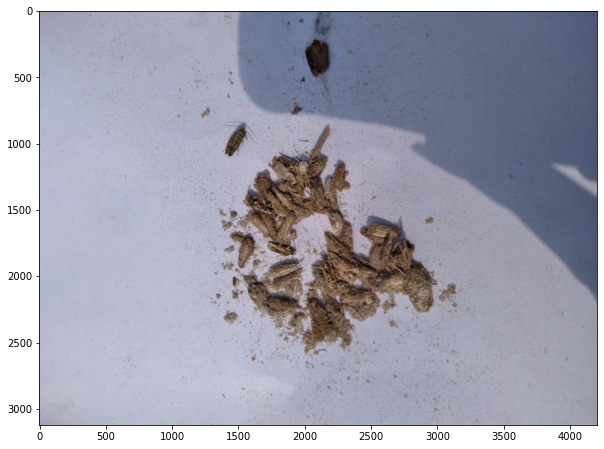

In [182]:
plt.figure(figsize=(10,10))

plt.imshow(np.transpose(read_image(f"data/raw/images/{img_id}.jpg"),(1,2,0)))

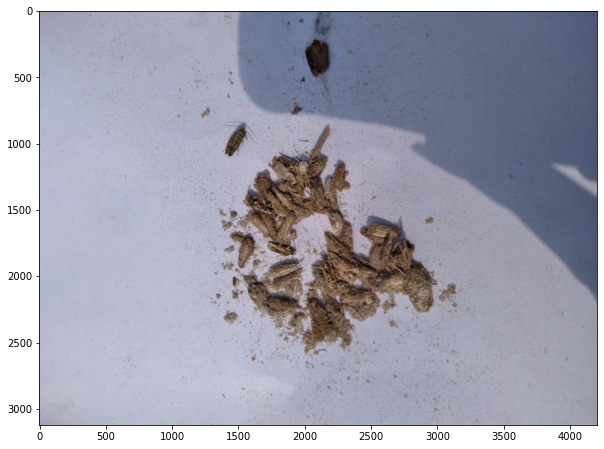

In [183]:
# img1 = img/np.max(img1)
plt.figure(figsize=(10,10))
plt.imshow(img1)

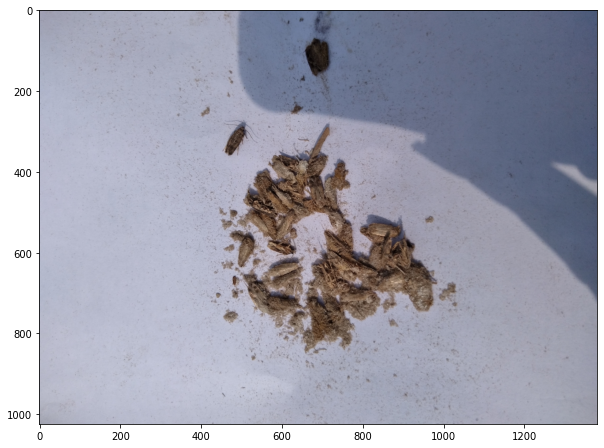

In [184]:
# img2 = img/np.max(img2)
plt.figure(figsize=(10,10))
plt.imshow(img2)

In [56]:
import os
import numpy as np

In [190]:
img_path = os.path.join(
            "A", os.path.splitext("id_89889248b9d02797d8f9c883.png")[0]+".npz"
        )
img_path

'A/id_89889248b9d02797d8f9c883.npz'

In [66]:
os.path.splitext("id_89889248b9d02797d8f9c883.png")[0]

'id_89889248b9d02797d8f9c883'

In [69]:
list(train_data.loc[:,"image_id_worm"])

NameError: name 'train_data' is not defined

In [107]:
import pandas as pd
train_filter = pd.read_csv("data/preproc/train_filter.csv")

In [108]:
train_filter

image_id_worm  bw  fold
0     id_0002ea6f15c7fa6f4c221783.jpg   1   2.0
1     id_0005ef295aafe6acc63587db.jpg   1   0.0
2     id_00084298dd030a500033ff78.jpg   0   4.0
3     id_00093f2c76f6488737325859.jpg   1   1.0
4     id_000b2e6c437c643f25d4a6c3.jpg   1   2.0
...                               ...  ..   ...
9132  id_ffe6e193dd78b7258d864f6b.jpg   1   4.0
9133  id_ffe98feb1e592e887b81c3f0.jpg   1   4.0
9134  id_ffef90ecf47baa38434f84fb.jpg   1   4.0
9135  id_fff06bb2e59bfce437ac9fc0.jpg   0   3.0
9136  id_fffdca893564aa86ff5be4cc.jpg   1   0.0

[9137 rows x 3 columns]

In [103]:
# from sklearn.model_selection import StratifiedKFold
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# for fold, (train_idx, val_idx) in enumerate(
#     skf.split(train_filter, train_filter["bw"])
# ):
#     train_filter.loc[val_idx, "fold"] = fold

In [109]:
train_filter.fold.value_counts()

1.0    1828
0.0    1828
3.0    1827
4.0    1827
2.0    1827
Name: fold, dtype: int64

In [106]:
train_filter.to_csv("data/preproc/train_filter.csv",index=False)

## Augmentation

In [74]:
import albumentations as A
import numpy as np
import torchvision.transforms as T
from albumentations.pytorch import ToTensorV2
a = {"train": A.Compose(
            [
                # T.ToTensor(),
                # T.Normalize(CFG.img_mean, CFG.img_std),
                # T.Resize(CFG.img_size),
                A.RandomBrightnessContrast(always_apply=False, p=0.5, brightness_limit=(-0.2, 0.57), contrast_limit=(-0.2, 0.44), brightness_by_max=True),
                A.Defocus(always_apply=False, p=0.5, radius=(3, 27), alias_blur=(0.1, 2.2)),
                A.Flip(always_apply=False, p=0.7),
#                 A.add_shadow(),
                A.CLAHE (clip_limit=4.0, tile_grid_size=(8, 8), always_apply=False, p=0.3),                
                A.Resize(256,256),
                A.Rotate(),
    
                ToTensorV2(),
                #             T.ColorJitter(brightness=0.5),
            ]
        )}

In [75]:
img_id ="id_ef29d597103dab9eb5c5e778"
img =np.load(f"data/preproc/np/{img_id}.npz")["img"]



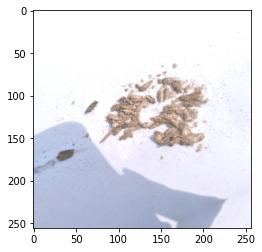

In [91]:
import matplotlib.pyplot as plt
plt.imshow(a["train"](image = img)["image"].T)

In [1]:
import cv2

In [130]:
import glob,os
import time
from multiprocessing import Pool
from PIL import Image as im

def np_to_jpg(file):
    main = "data/preproc"
    img = np.load(file)["img"]
    img = im.fromarray(img)
    img.save(f'{main}/jpg/{os.path.basename(file)[:-4]}.jpg')
    
main = "data/preproc"
files = glob.glob(f"{main}/np/*")


start_time = time.time()

with Pool(10) as pool:
    result = pool.map(np_to_jpg,files)
    
print("--- %s seconds ---" % (time.time() - start_time))

--- 50.272138833999634 seconds ---


## Focal loss

In [8]:
import torch
from torchvision.ops import sigmoid_focal_loss

In [9]:
y_pred =torch.tensor([0.7,0.3,1])
y_true =torch.tensor([1.0,0,0])
loss = sigmoid_focal_loss
loss(y_pred,y_true,reduction="sum")

tensor(0.7489)

In [10]:
torch.nn.BCELoss()(y_pred,y_true)

tensor(33.5711)

In [11]:
import torch.nn as nn
m = nn.Sigmoid()
loss = nn.BCELoss()

loss1 = loss(m(input), target)
loss2 = sigmoid_focal_loss(input, target)
loss1,loss2

TypeError: sigmoid(): argument 'input' (position 1) must be Tensor, not method

In [12]:
sigmoid_focal_loss((input), target,reduction="mean"),torch.mean(sigmoid_focal_loss(m(input), target))

NameError: name 'target' is not defined

In [33]:
input,m(input),target

(tensor([-1.4501,  0.4089,  0.6370], requires_grad=True),
 tensor([0.1900, 0.6008, 0.6541], grad_fn=<SigmoidBackward0>),
 tensor([1., 0., 1.]))

In [19]:
import math
from torch.nn import functional as F
pt = 0.1900
((1-pt)**2)*math.log10(pt)

-0.473209762414849

In [20]:
inputs = torch.randn(3, requires_grad=True)
targets = torch.empty(3).random_(2)
inputs = inputs.float()
targets = targets.float()
gamma =2
alpha =.25
reduction = ""

In [21]:
targets

tensor([0., 1., 1.])

In [22]:
p = torch.sigmoid(inputs)
ce_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction="none")

In [23]:
p_t = p * targets + (1 - p) * (1 - targets)
p_t

tensor([0.3671, 0.4033, 0.4302], grad_fn=<AddBackward0>)

In [24]:
loss = ce_loss * ((1 - p_t) ** gamma)
loss,ce_loss

(tensor([0.4014, 0.3232, 0.2738], grad_fn=<MulBackward0>),
 tensor([1.0022, 0.9080, 0.8434],
        grad_fn=<BinaryCrossEntropyWithLogitsBackward0>))

In [29]:
if alpha >= 0:
    alpha_t = alpha * targets + (1 - alpha) * (1 - targets)
    loss = alpha_t * loss

In [31]:
loss

tensor([0.3011, 0.0808, 0.0684], grad_fn=<MulBackward0>)

In [32]:
reduction= "sum"

if reduction == "mean":
    loss = loss.mean()
elif reduction == "sum":
    loss = loss.sum()
loss

tensor(0.4503, grad_fn=<SumBackward0>)

In [35]:
2*0.01

0.02

In [64]:
inputs,targets,sigmoid_focal_loss(inputs,targets)

(tensor([1.7857, 1.0850, 1.6890], requires_grad=True),
 tensor([0., 1., 0.]),
 tensor([1.0675, 0.0046, 0.9931], grad_fn=<MulBackward0>))

In [100]:
import pandas as pd
train_filter = pd.read_csv("data/preproc/train_filter.csv")
train_filter

image_id_worm  bw  fold
0     id_0002ea6f15c7fa6f4c221783.jpg   1   2.0
1     id_0005ef295aafe6acc63587db.jpg   1   0.0
2     id_00084298dd030a500033ff78.jpg   0   4.0
3     id_00093f2c76f6488737325859.jpg   1   1.0
4     id_000b2e6c437c643f25d4a6c3.jpg   1   2.0
...                               ...  ..   ...
9132  id_ffe6e193dd78b7258d864f6b.jpg   1   4.0
9133  id_ffe98feb1e592e887b81c3f0.jpg   1   4.0
9134  id_ffef90ecf47baa38434f84fb.jpg   1   4.0
9135  id_fff06bb2e59bfce437ac9fc0.jpg   0   3.0
9136  id_fffdca893564aa86ff5be4cc.jpg   1   0.0

[9137 rows x 3 columns]

In [101]:
train_filter.bw.value_counts()

1    6179
0    2958
Name: bw, dtype: int64

In [38]:
efficientnet = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_efficientnet_b0', pretrained=True)

Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


In [43]:
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_convnets_processing_utils')
device= "cuda:0"
efficientnet.eval().to(device)

Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


EfficientNet(
  (stem): Sequential(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (activation): SiLU(inplace=True)
  )
  (layers): Sequential(
    (0): Sequential(
      (block0): MBConvBlock(
        (depsep): Sequential(
          (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (se): SequentialSqueezeAndExcitation(
          (squeeze): Linear(in_features=32, out_features=8, bias=True)
          (expand): Linear(in_features=8, out_features=32, bias=True)
          (activation): SiLU(inplace=True)
          (sigmoid): Sigmoid()
          (mul_a_quantizer): Identity()
          (mul_b_quantizer): Identity()
        )
      

In [44]:
uris = [
    'http://images.cocodataset.org/test-stuff2017/000000024309.jpg',
    'http://images.cocodataset.org/test-stuff2017/000000028117.jpg',
    'http://images.cocodataset.org/test-stuff2017/000000006149.jpg',
    'http://images.cocodataset.org/test-stuff2017/000000004954.jpg',
]

batch = torch.cat(
    [utils.prepare_input_from_uri(uri) for uri in uris]
).to(device)

In [61]:
!ls data/preproc/np/id_0002ea6f15c7fa6f4c221783.npz

data/preproc/np/id_0002ea6f15c7fa6f4c221783.npz


In [70]:
utils

<PyTorch.Classification.ConvNets.image_classification.models.entrypoints.nvidia_convnets_processing_utils.<locals>.Processing at 0x7f8c5f4efd60>

In [63]:
img = np.load("data/preproc/np/id_0002ea6f15c7fa6f4c221783.npz")["img"]

In [68]:
utils.prepare_input_from_(img)

AttributeError: 'Processing' object has no attribute 'prepare_input_from_numpy'

In [51]:
batch.shape

torch.Size([4, 3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


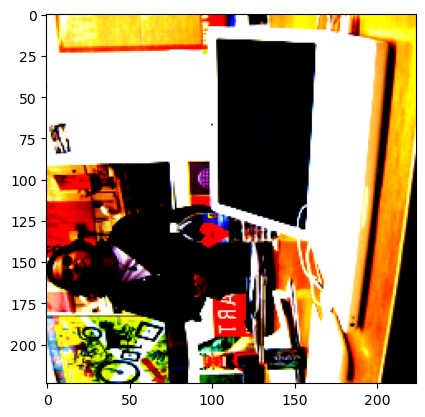

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


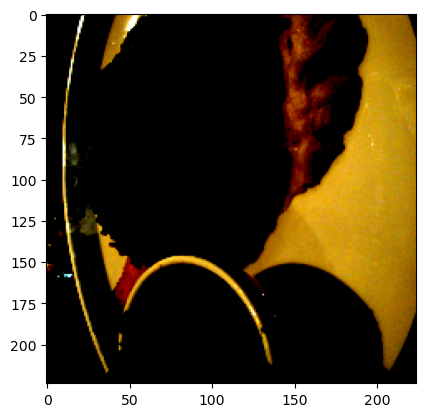

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


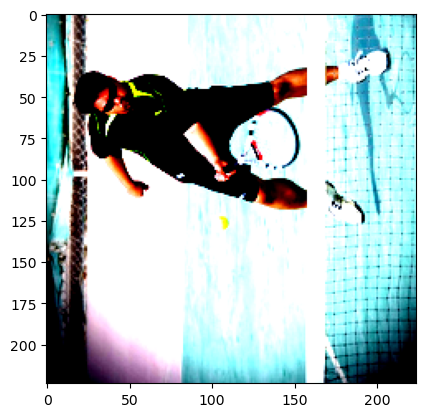

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


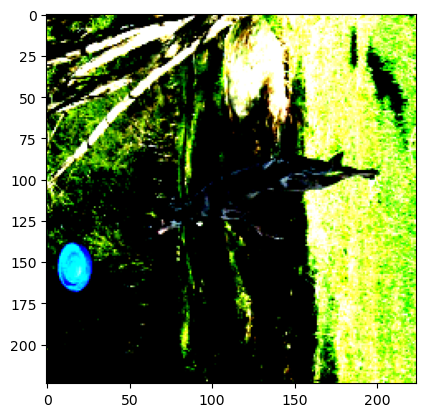

In [56]:
for img in batch:
#     img = Image.open(requests.get(uri, stream=True).raw)
#     img.thumbnail((256,256), Image.ANTIALIAS)
    plt.imshow(img.cpu().T)
    plt.show()

In [45]:
with torch.no_grad():
    output = torch.nn.functional.softmax(efficientnet(batch), dim=1)
    
results = utils.pick_n_best(predictions=output, n=5)

sample 0: [('laptop, laptop computer', '49.9%'), ('notebook, notebook computer', '36.2%'), ('desk', '3.7%'), ('mouse, computer mouse', '0.5%'), ('space bar', '0.5%')]
sample 1: [('mashed potato', '87.0%'), ('meat loaf, meatloaf', '5.2%'), ('broccoli', '1.9%'), ('plate', '0.3%'), ('guacamole', '0.1%')]
sample 2: [('racket, racquet', '55.8%'), ('tennis ball', '8.4%'), ('ping-pong ball', '2.6%'), ('golf ball', '0.6%'), ('baseball', '0.6%')]
sample 3: [('kelpie', '52.7%'), ('malinois', '4.1%'), ('groenendael', '3.0%'), ('schipperke', '3.0%'), ('Scottish deerhound, deerhound', '2.6%')]


/tmp/ipykernel_21413/1800144158.py:8: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img.thumbnail((256,256), Image.ANTIALIAS)


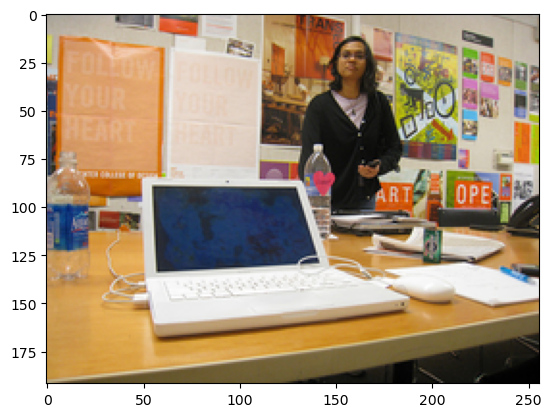

[('laptop, laptop computer', '49.9%'), ('notebook, notebook computer', '36.2%'), ('desk', '3.7%'), ('mouse, computer mouse', '0.5%'), ('space bar', '0.5%')]


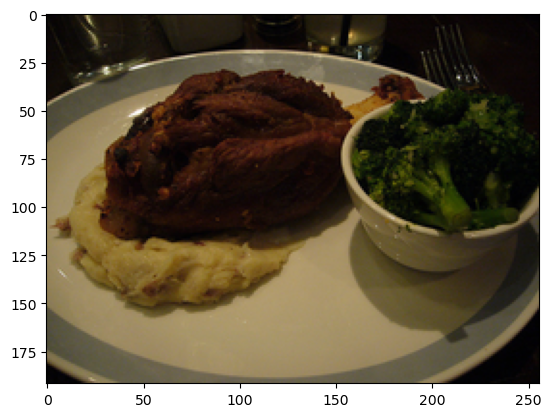

[('mashed potato', '87.0%'), ('meat loaf, meatloaf', '5.2%'), ('broccoli', '1.9%'), ('plate', '0.3%'), ('guacamole', '0.1%')]


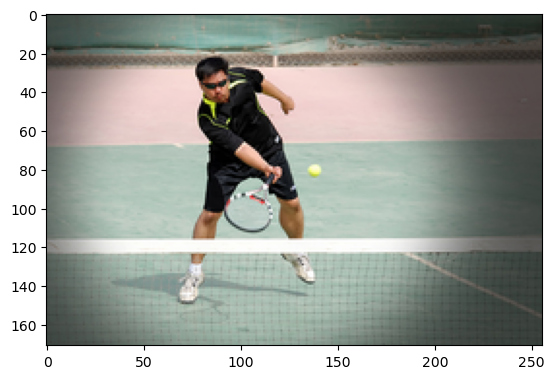

[('racket, racquet', '55.8%'), ('tennis ball', '8.4%'), ('ping-pong ball', '2.6%'), ('golf ball', '0.6%'), ('baseball', '0.6%')]


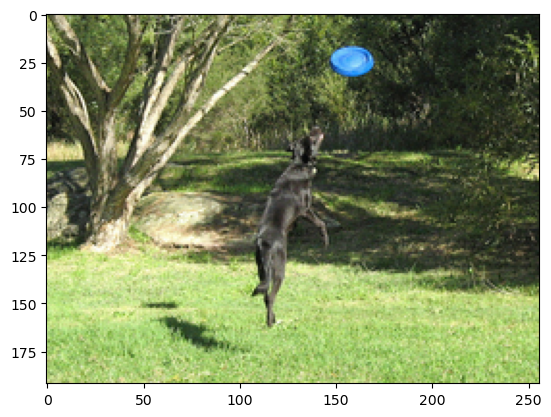

[('kelpie', '52.7%'), ('malinois', '4.1%'), ('groenendael', '3.0%'), ('schipperke', '3.0%'), ('Scottish deerhound, deerhound', '2.6%')]


In [48]:
from PIL import Image
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
for uri, result in zip(uris, results):
    img = Image.open(requests.get(uri, stream=True).raw)
    img.thumbnail((256,256), Image.ANTIALIAS)
    plt.imshow(img)
    plt.show()
    print(result)

In [50]:
results

4

## Dataset

In [36]:
import pandas as pd
import imp
import matplotlib.pyplot as plt

In [37]:
from utils import dataset 
from utils import loader 
imp.reload(dataset)
imp.reload(loader)



<module 'utils.loader' from '/workspace/Sourabh/bollworm/utils/loader.py'>

In [38]:
train_filter = pd.read_csv("data/preproc/train_filter.csv")
print(f"No of Examples used(train+val): {len(train_filter)}")
# Get DataLoaders
dataloaders, class_weights = loader.get_loaders(train_filter, fold=0)
print(class_weights)

No of Examples used(train+val): 9137
tensor([1.5446, 0.7393], device='cuda:0')


In [39]:
trainiter = iter(dataloaders["train"])
images,labels = next(trainiter)

In [41]:
images.shape

torch.Size([8, 3, 256, 256])

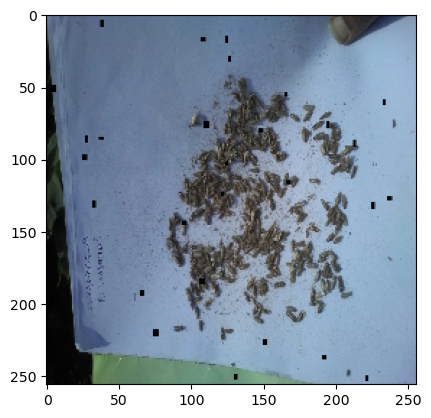

In [42]:
plt.imshow(images[0].cpu().numpy().T)

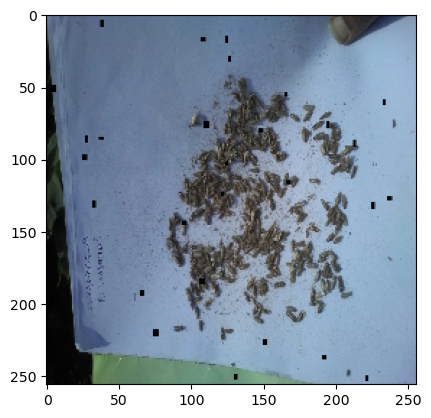

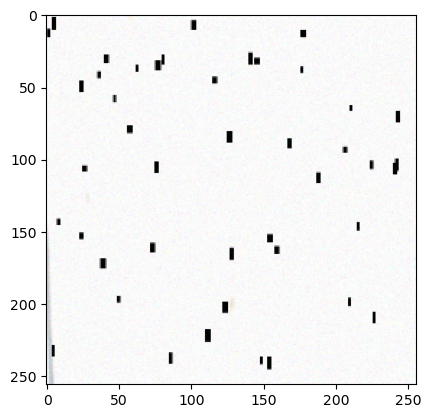

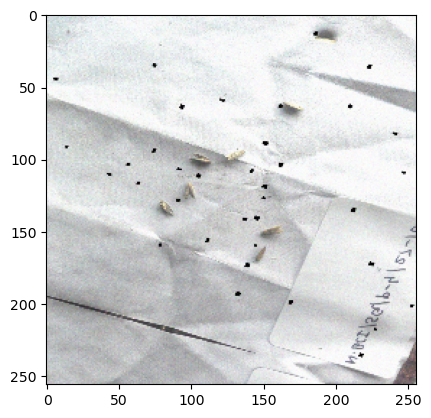

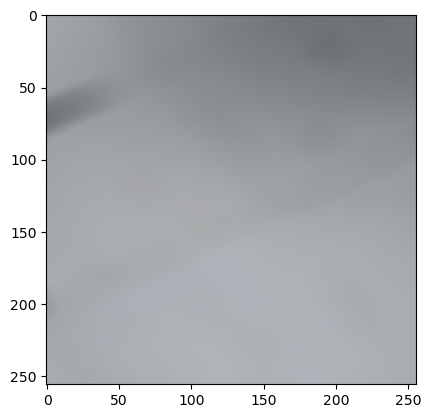

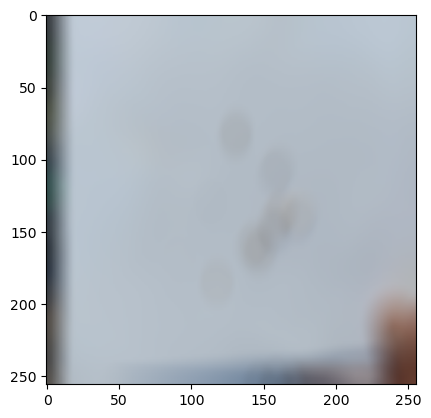

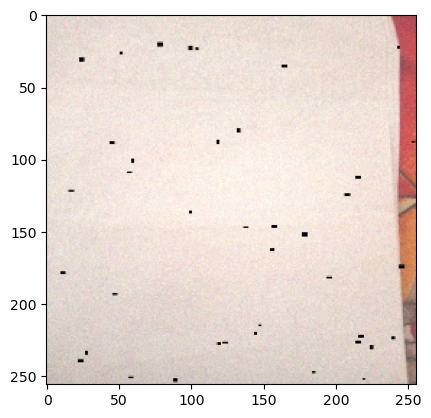

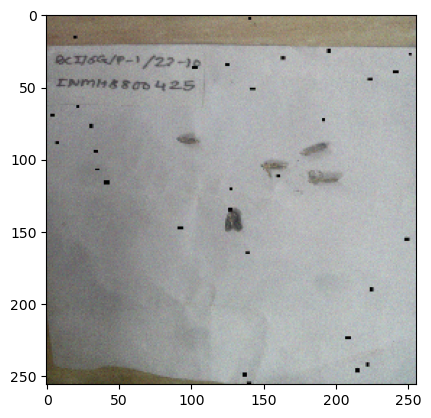

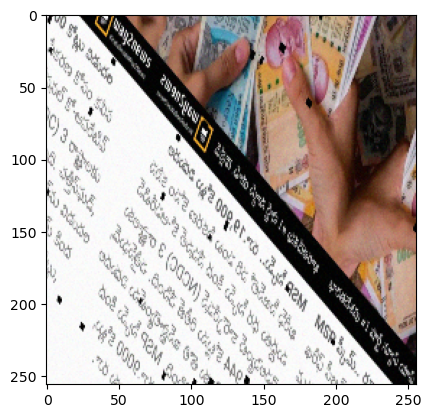

In [43]:
for idx in range(8):
#     img_id = img_ids[idx]
    img = images[idx]
#     print(img_id)
    plt.imshow(img.cpu().numpy().T)
    plt.show()

In [10]:
# !ls data/preproc/np

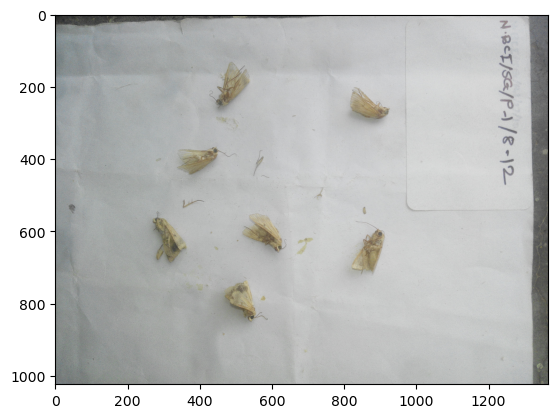

In [12]:
import numpy as np

plt.imshow(np.load("data/preproc/np/id_7c9bbbb5329901d17a9f8ae0.npz")["img"])

(1024, 1365, 3)


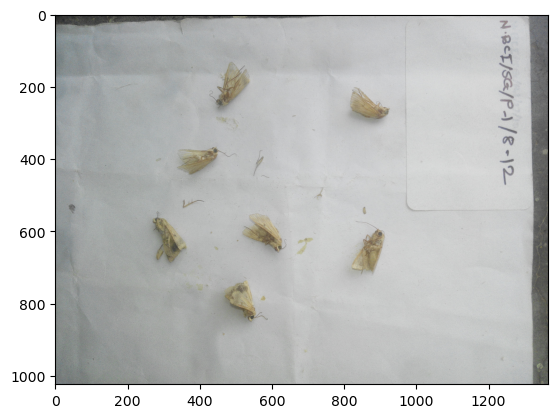

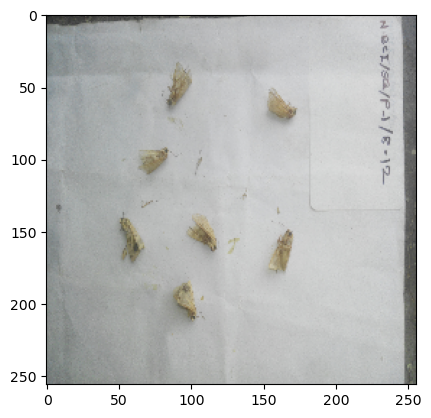

In [63]:
import os,torch
import torchvision.transforms as T

img_id = "id_7c9bbbb5329901d17a9f8ae0"
img_dir ="data/preproc/np/"
img_path = os.path.join(
    img_dir, img_id+ ".npz"
)

image = np.load(img_path)["img"][:3]
plt.imshow(transform(torch.tensor(image)).T)

transform = T.Resize(size = (256,256))
plt.imshow(transform(torch.tensor(image)).T)


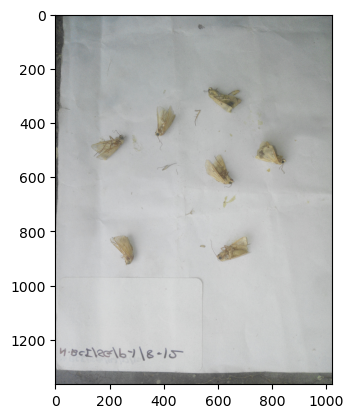

In [37]:
image = np.load(img_path)["img"].transpose(2,0,1)[:3]
plt.imshow(image.T)